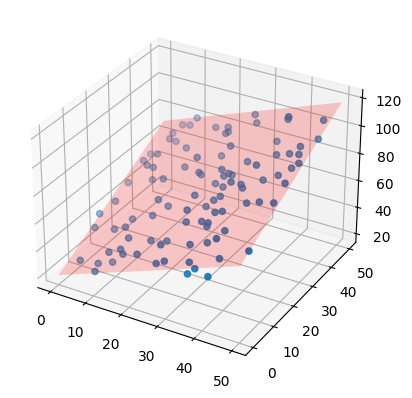

In [47]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = np.random.uniform(0, 50, (100, 2))
y_val = X @ np.array([1, 1]) + 20 + np.random.normal(0, 5, X.shape[0])

X_bias = np.hstack((X, np.ones(X.shape[0]).reshape(-1, 1)))
fit = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y_val

x = np.linspace(0, 50, 2)
y = np.linspace(0, 50, 2)
xx, yy = np.meshgrid(x, y)
z = xx * fit[0] + yy * fit[1] + fit[2]
ax.plot_surface(xx, yy, z, alpha=0.2, color='red')
ax.scatter(X[:, 0], X[:, 1], y_val, marker='o')
plt.show()

[1.0008296  4.93417369]


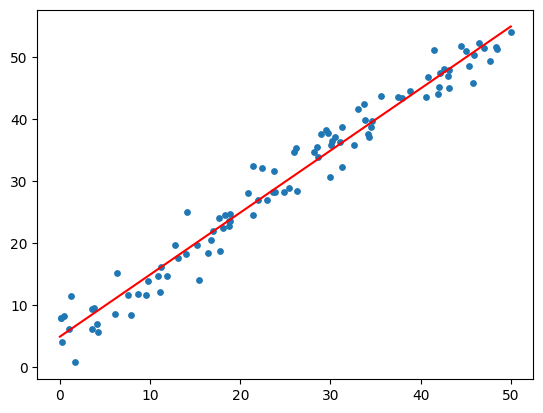

In [136]:
fig = plt.figure()
ax = fig.add_subplot()

X = np.random.uniform(0, 50, (100, 1))
y_val = X @ np.array([1]) + 5 + np.random.normal(0, 3, X.shape[0])

X_bias = np.hstack((X, np.ones(X.shape[0]).reshape(-1, 1)))
fit = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y_val

xx = np.linspace(0, 50, 2)
y = xx * fit[0] + fit[1]
ax.plot(xx, y, color='red')
ax.scatter(X[:, 0], y_val, marker='o', s=15)
print(fit)
plt.show()

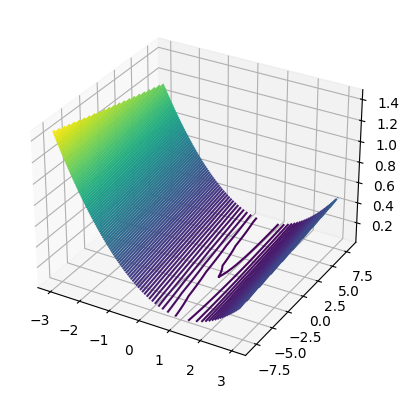

In [152]:
def mse2(a, b):
    y_hat = X*a + b
    return np.sum(np.power(y_hat - y_val, 2))

def f(x, y):
    d = np.zeros((30, 30))
    for i in range(30):
        for j in range(30):
            d[i, j] = mse2(x[i, j], y[i, j])
    return d


fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.linspace(-3, 3, 30)
y = np.linspace(-8, 8, 30)
xx, yy = np.meshgrid(x, y)
z = f(xx, yy)
ax.contour3D(xx, yy, z, 100)
# ax.view_init(0, 90)
plt.show()

In [23]:
X = np.random.uniform(-50, 50, (8, 3))
y = X @ np.array([1, -2, 4]) + 10 + np.random.normal(0, 1, X.shape[0])
add = X @ np.array([1, 2, 2]) + 20 + np.random.normal(0, 10, X.shape[0])
X = np.hstack((X, add.reshape(-1, 1)))

In [24]:
print(X)

[[   8.75996352  -22.71780976  -12.91472008  -36.41665781]
 [ -30.29457198   -4.01441162  -45.53876987 -119.85346864]
 [  29.97958846  -42.3043553     1.88351488  -18.75063948]
 [ -19.31899005    7.75429488   45.94333408  114.97444953]
 [  14.55702445  -46.46375642   -6.95975605  -59.27153821]
 [   1.00168523    3.61774947   18.13925106   58.2348107 ]
 [ -22.24039023  -37.11394345  -10.73243235 -102.74341301]
 [  45.64057228  -31.28691082   40.39839549  106.90270859]]


In [25]:
def linear_reg(X, y):
    X_bias = np.hstack((X, np.ones(X.shape[0]).reshape(-1, 1)))
    fit = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    # print(X_bias @ fit)
    return fit, X_bias @ fit

In [26]:
def mse(y_hat, y):
    return np.sum(np.power(y_hat - y, 2))

In [27]:
def check_dependence(X):
    min, min_ind = float("inf"), 0
    for i in range(X.shape[1]):
        y = X[:, i]
        new_X = np.delete(X, i, 1)
        f, y_hat = linear_reg(new_X, y)
        m = mse(y_hat, y)
        if abs(m) < min:
            min = abs(m)
            min_ind = i
        print(m)
    return np.delete(X, 1, 1)
